## EDA and Modelling to predict the Player LeaderBoard of Pro Kabbadi 2019

### Player Analysis Season 7

### Reading data from file

In [1]:
# import all libraries and dependencies for dataframe
from pyforest import *
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

# import all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.base import TransformerMixin

In [2]:
# Local file path. Please change the file path accordingly

path = 'C:\\Users\\I330405\\Documents\\HACKATHON\\'
file = path + 'Player_Stat_Season 7.xlsx'

#### Player Total Points

In [3]:
# Reading the Team_leaderboard file on which Analysis needs to be done

df_Player_Total_points = pd.read_excel(file,'Total Points')

df_Player_Total_points.head()

,Rank,Player,Team,Matches,Points
0,1,Pawan Kumar Sehrawat,Bengaluru Bulls,17,228
1,2,Pardeep Narwal,Patna Pirates,17,207
2,3,Naveen Kumar,Dabang Delhi,16,199
3,4,Maninder Singh,Bengal Warriors,18,175
4,5,Siddharth Sirish Desai,Telugu Titans,16,140


In [4]:
df_Player_Total_points.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
Rank       20 non-null int64
Player     20 non-null object
Team       20 non-null object
Matches    20 non-null int64
Points     20 non-null int64
dtypes: int64(3), object(2)
memory usage: 928.0+ bytes


In [5]:
df_Player_Total_points['Avg Player Points'] = df_Player_Total_points['Points']/df_Player_Total_points['Matches']
df_Player_Total_points = df_Player_Total_points.drop(['Points','Matches'],axis=1)
df_Player_Total_points = df_Player_Total_points.sort_values(by='Avg Player Points',ascending=False)

#### Player Raid Points

In [6]:
df_Player_Raid_points = pd.read_excel(file,'Raid Points')

#df_Player_Raid_points.head(2)
df_Player_Raid_points['Avg Player Raid Points'] = df_Player_Raid_points['Points']/df_Player_Raid_points['Matches']
df_Player_Raid_points = df_Player_Raid_points.drop(['Points','Matches'],axis=1)
df_Player_Raid_points = df_Player_Raid_points.sort_values(by='Avg Player Raid Points',ascending=False)

#### Player Tackle Points

In [7]:
df_Player_Tackle_points = pd.read_excel(file,'Tackle Points')

df_Player_Tackle_points['Avg Player Tackle Points'] = df_Player_Tackle_points['Points']/df_Player_Tackle_points['Matches']
df_Player_Tackle_points = df_Player_Tackle_points.drop(['Points','Matches'],axis=1)
df_Player_Tackle_points = df_Player_Tackle_points.sort_values(by='Avg Player Tackle Points',ascending=False)

#### Player Analysis

#### Avg Player Points of Player in S7

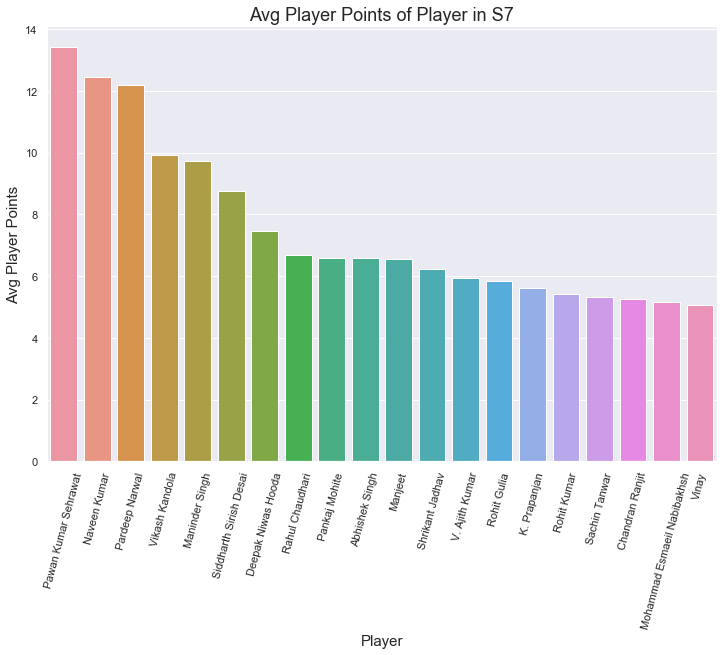

In [8]:
plt.subplots(figsize = (12,8))
ax = sns.barplot(x = 'Player', y = 'Avg Player Points',data=df_Player_Total_points)
plt.title("Avg Player Points of Player in S7", fontsize = 18)
plt.ylabel("Avg Player Points", fontsize = 15)
plt.xlabel("Player",fontsize = 15)
ax=ax.set_xticklabels(ax.get_xticklabels(), rotation=75)

#### Avg Raid Points of Player in S7

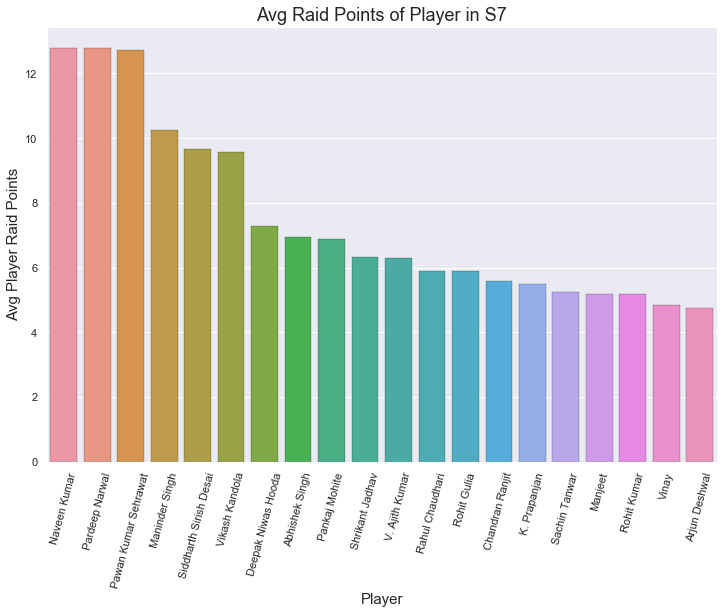

In [9]:
plt.subplots(figsize = (12,8))
ax = sns.barplot(x = 'Player', y = 'Avg Player Raid Points', data=df_Player_Raid_points, edgecolor=(0,0,0), linewidth=0.2)
plt.title("Avg Raid Points of Player in S7", fontsize = 18)
plt.ylabel("Avg Player Raid Points", fontsize = 15)
plt.xlabel("Player",fontsize = 15)
ax=ax.set_xticklabels(ax.get_xticklabels(), rotation=75)

#### Avg Tackle Points of Player in S7

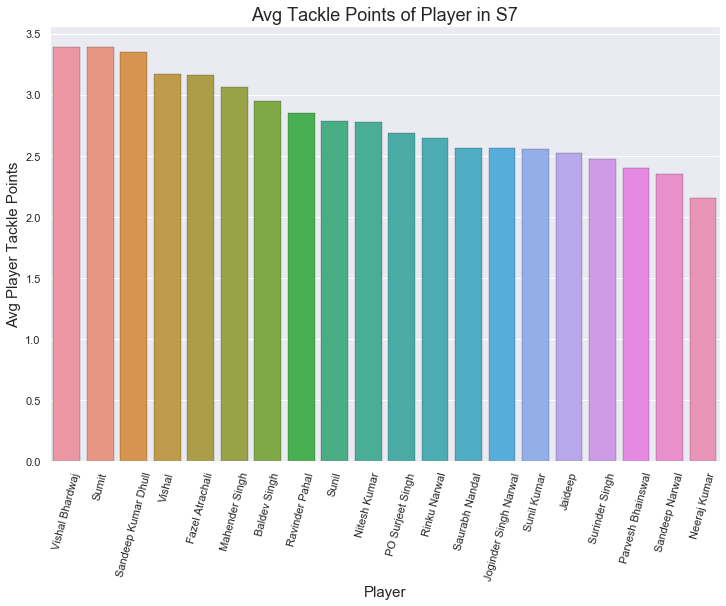

In [10]:
plt.subplots(figsize = (12,8))
ax = sns.barplot(x = 'Player', y = 'Avg Player Tackle Points', data=df_Player_Tackle_points, edgecolor=(0,0,0), linewidth=0.2)
plt.title("Avg Tackle Points of Player in S7", fontsize = 18)
plt.ylabel("Avg Player Tackle Points", fontsize = 15)
plt.xlabel("Player",fontsize = 15)
ax=ax.set_xticklabels(ax.get_xticklabels(), rotation=75)

### Successful Raid % of Player

In [11]:
df_Player_Raid_points = df_Player_Raid_points.sort_values(by='Successful Raid %',ascending=False)
df_Player_Raid_points = df_Player_Raid_points.reset_index(drop=True)
df_Player_Raid_points = df_Player_Raid_points.loc[:5,:]
df_Player_Raid_points

,Rank,Player,Team,Successful Raid %,Avg Player Raid Points
0,1,Pawan Kumar Sehrawat,Bengaluru Bulls,70.5500,12.7368
1,4,Maninder Singh,Bengal Warriors,64.6400,10.2500
2,5,Siddharth Sirish Desai,Telugu Titans,63.9700,9.6667
3,2,Pardeep Narwal,Patna Pirates,63.4400,12.7895
4,3,Naveen Kumar,Dabang Delhi,62.7400,12.8000
5,15,V. Ajith Kumar,Tamil Thalaivas,56.5200,6.2941


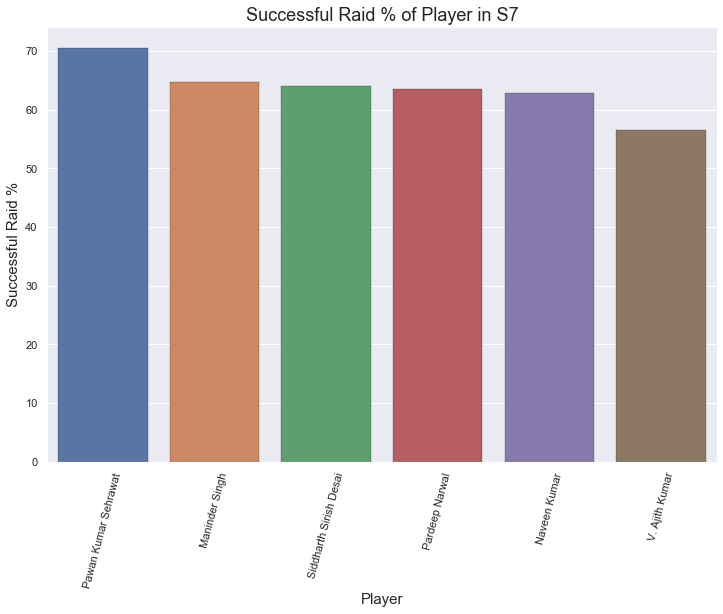

In [12]:
plt.subplots(figsize = (12,8))

ax = sns.barplot(x = 'Player', y = 'Successful Raid %', data=df_Player_Raid_points, edgecolor=(0,0,0), linewidth=0.2)
plt.title("Successful Raid % of Player in S7", fontsize = 18)
plt.ylabel("Successful Raid %", fontsize = 15)
plt.xlabel("Player",fontsize = 15)
ax=ax.set_xticklabels(ax.get_xticklabels(), rotation=75)

#### Insights:
* Pawan Kumar Sehrawat will top the Successful Raid % table

### Successful Tackle % of Player

In [13]:
df_Player_Tackle_points = df_Player_Tackle_points.sort_values(by='Successful Tackle %',ascending=False)
df_Player_Tackle_points = df_Player_Tackle_points.reset_index(drop=True)
df_Player_Tackle_points = df_Player_Tackle_points.loc[:10,:]
df_Player_Tackle_points

,Rank,Player,Team,Successful Tackle %,Avg Player Tackle Points
0,13,Nitesh Kumar,UP Yoddha,58.8200,2.7778
1,4,Fazel Atrachali,U Mumba,58.7600,3.1579
2,17,Sandeep Narwal,U Mumba,58.3300,2.3529
3,2,Vishal Bhardwaj,Telugu Titans,58.0900,3.3889
4,5,Baldev Singh,Bengal Warriors,56.0000,2.9500
5,20,Vishal,Pink Panthers,55.4000,3.1667
6,3,Sumit,UP Yoddha,54.9500,3.3889
7,18,Parvesh Bhainswal,Fortune Giants,54.5400,2.4000
8,15,Saurabh Nandal,Bengaluru Bulls,54.0200,2.5625
9,9,Sunil Kumar,Fortune Giants,53.4800,2.5556


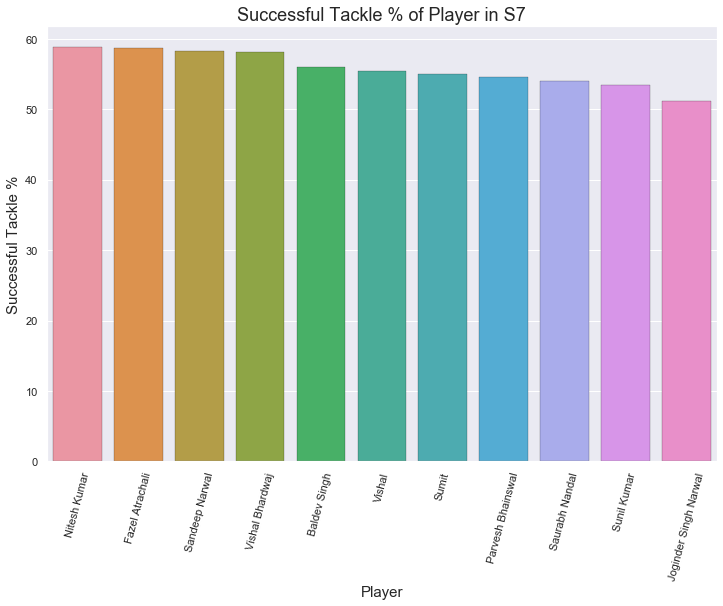

In [14]:
plt.subplots(figsize = (12,8))

ax = sns.barplot(x = 'Player', y = 'Successful Tackle %', data=df_Player_Tackle_points, edgecolor=(0,0,0), linewidth=0.2)
plt.title("Successful Tackle % of Player in S7", fontsize = 18)
plt.ylabel("Successful Tackle %", fontsize = 15)
plt.xlabel("Player",fontsize = 15)
ax=ax.set_xticklabels(ax.get_xticklabels(), rotation=75)

#### Insights:
* Nitesh Kumar will top the Successful Tackle % table